In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

Anotaciones:
Desde el lado de Estadistica querriamos ver que tan bueno se aproxima a una gaussiana. Desde ML que tan bien generaliza

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#from sklearn.model_selection import train_test_split
#data_all = pd.read_csv('data/alturas-pesos-mils.csv')
#data, test = train_test_split(data_all, test_size=0.2)
#print(data)

In [4]:
data = pd.read_csv('data/alturas-pesos-mils-train.csv')

In [5]:
test = pd.read_csv('data/alturas-pesos-mils-test.csv')

In [6]:
from BiVariateJoint import BiVariateJoint

In [7]:
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values

# Grafico los datos

In [8]:
%matplotlib qt
f = plt.figure(figsize=(20,10))
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, label='Hombres')
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

# Regla de Bayes (Discreto)
$Peso \rightarrow X_1$

$Altura \rightarrow X_2$
\begin{equation}
P(Hombre | X_1, X_2) = \frac{P(X_1,X_2 | Hombre) P(Hombre)}{P(X_1,X_2)} \\
\end{equation}

\begin{equation}
P(Mujer | X_1, X_2) = \frac{P(X_1,X_2 | Mujer) P(Mujer)}{P(X_1,X_2)}
\end{equation}

# Regla de Bayes (Continuo)
\begin{equation}
P(Hombre | X_1, X_2) = \frac{p(X_1,X_2 | Hombre) P(Hombre)}{p(X_1,X_2)} \\ \\
\end{equation}

\begin{equation}
P(Mujer | X_1, X_2) = \frac{p(X_1,X_2 | Mujer) P(Mujer)}{p(X_1,X_2)}
\end{equation}

Que tenemos?
\begin{equation}
P(Hombre) = \frac{N_{H}}{N_H + N_M} \quad
\end{equation}

\begin{equation}
P(Mujer) = \frac{N_{M}}{N_H + N_M} \quad
\end{equation}


\begin{equation}
\large
p(X_1,X_2) = p(X_1,X_2 | Mujer) P(Mujer) + p(X_1,X_2 | Hombre) P(Hombre)
\end{equation}

Con estimar:
\begin{equation}
P(X_1,X_2 | Mujer) \quad y \quad
P(X_1,X_2 | Hombre) 
\end{equation}
\begin{equation}
o
\end{equation}
\begin{equation}
p(X_1,X_2 | Mujer) \quad y \quad
p(X_1,X_2 | Hombre) 
\end{equation}

# Estimación de $P(X_1,X_2 | Género)$ como histogramas

\begin{equation}
P(X_1 = x_1,X_2 = x_2 | Hombre) = \frac{N_{x_1x_2H}}{N}
\end{equation}

\begin{equation}
P(X_1 = x_1,X_2 = x_2 | Mujer) = \frac{N_{x_1x_2M}}{N}
\end{equation}

### Resolución del histograma (Cantidad de Bins o Grupos)

In [18]:
from BiVariateJoint import get_class_prob

In [19]:
train_acc = []
test_acc = []
steps = [0.5, 1, 2, 4,  8, 16]
for step in steps:
    maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
    mins = np.round(data[['Peso','Altura']].values.min(axis = 0))

    joint_hombres = BiVariateJoint(data_hombres, 
                                   step_X = step, 
                                   step_Y = step,
                                   mins = mins, 
                                   maxs = maxs
                                  )
    joint_mujeres = BiVariateJoint(data_mujeres, 
                                   step_X = step, 
                                   step_Y = step,
                                   mins = mins, 
                                   maxs = maxs)
    p_class_1, p_class_2 = get_class_prob(data['Peso'].values, data['Altura'].values, joint_hombres, joint_mujeres)
    acc_train_bayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)
    train_acc.append(acc_train_bayes)
    p_class_1, p_class_2 = get_class_prob(test['Peso'].values, test['Altura'].values, joint_hombres, joint_mujeres)
    acc_cv_bayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
    test_acc.append(acc_cv_bayes)

In [20]:
%matplotlib qt
plt.xscale('log')
plt.plot(steps, train_acc, label='Train', marker='x')
plt.plot(steps, test_acc, label='CV', marker='x')
plt.xticks(steps, steps)
plt.xlabel('Resolución Peso/Altura')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
step = 8
maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
mins = np.round(data[['Peso','Altura']].values.min(axis = 0))

joint_hombres = BiVariateJoint(data_hombres, 
                               step_X = step, 
                               step_Y = step,
                               mins = mins, 
                               maxs = maxs
                              )
joint_mujeres = BiVariateJoint(data_mujeres, 
                               step_X = step, 
                               step_Y = step,
                               mins = mins, 
                               maxs = maxs)

In [22]:
%matplotlib qt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(joint_hombres.data_rounded[:,0], joint_hombres.data_rounded[:,1], color='b', s=200 * step, marker='s', alpha=0.01)
ax.scatter(joint_hombres.data[:,0], joint_hombres.data[:,1], color='b', s=1,  alpha=1, label='Hombres')
ax.scatter(joint_mujeres.data_rounded[:,0], joint_mujeres.data_rounded[:,1], color='r', s=200 * step, marker='s', alpha=0.01)
ax.scatter(joint_mujeres.data[:,0], joint_mujeres.data[:,1], color='r', s=1,  alpha=1, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

In [23]:
def getAxis():
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    ax1.set_xlabel('Pesos [cms]')
    ax1.set_ylabel('Alturas [cms]')
    ax2.set_xlabel('Pesos [kgs]')
    ax2.set_ylabel('Alturas [cms]')
    ax2.set_zlabel('Frecuencia')
    fig.tight_layout()
    return ax1, ax2

In [24]:
%matplotlib qt
ax1, ax2 = getAxis()
joint_hombres.plot_joint_3d(ax=ax1, color='b', el=20, az=-5, title='Hombres')
joint_mujeres.plot_joint_3d(ax=ax2, color='r', el=20, az=-5, title='Mujeres')

## Calculo a posteriori

\begin{equation}
P(Hombre | X_1, X_2) = \frac{P(X_1,X_2 | Hombre) P(Hombre)}{P(X_1,X_2)} \\
\end{equation}


In [17]:
p_class_1, p_class_2 = get_class_prob(data['Peso'].values, data['Altura'].values, joint_hombres, joint_mujeres)
acc_train_bayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)
print(acc_train_bayes)

0.9005


In [224]:
p_class_1, p_class_2 = get_class_prob(test['Peso'].values, test['Altura'].values, joint_hombres, joint_mujeres)
acc_cv_bayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
print(acc_cv_bayes)

0.9035


In [225]:
X, Y = np.meshgrid(joint_hombres.X, joint_hombres.Y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    Z[i] = get_class_prob(X[i], Y[i], joint_hombres, joint_mujeres)[0]

## Las clases en el plano

In [226]:
%matplotlib qt
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.set_title('TRAIN: ' + str(np.round(acc_train_bayes*100)/100) + ' - CV:' + str(np.round(acc_cv_bayes*100)/100) +' - Step: '+str(step))
ax.set_xlabel('Pesos [kgs]')
ax.set_ylabel('Alturas [cms]')
plt.show()

## Naive Bayes (Supongo independencia)

\begin{equation}
P(X_1,X_2 | Género) = P(X_1 | Género) P(X_1 | Género)
\end{equation}

In [73]:
marg_pesos_hombres,  marg_alturas_hombres = joint_hombres.get_Marginals()
marg_pesos_mujeres,  marg_alturas_mujeres = joint_mujeres.get_Marginals()

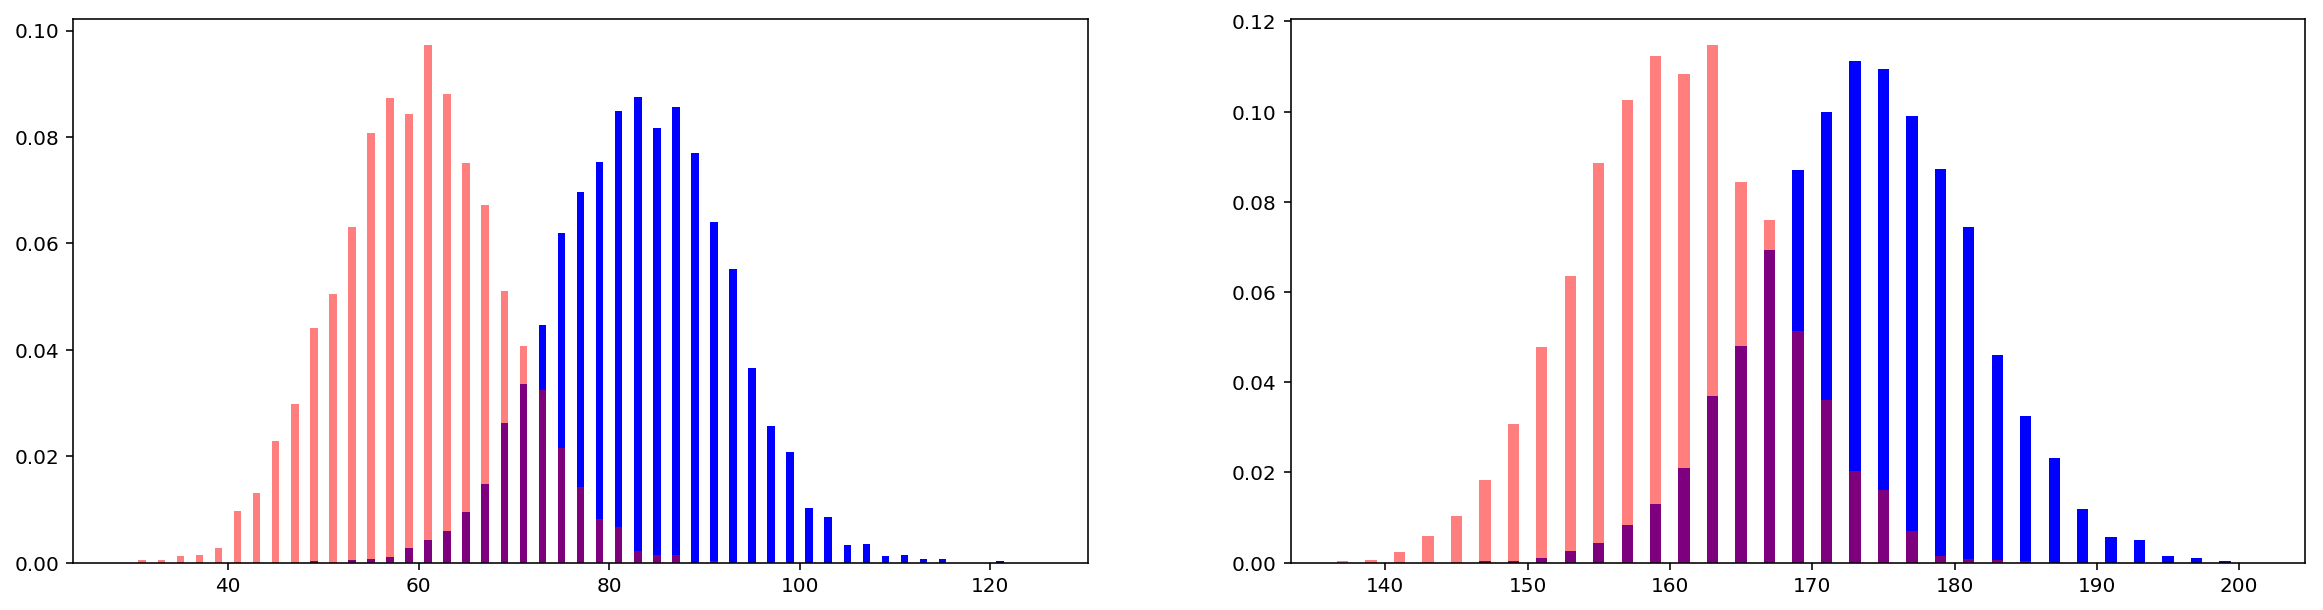

In [74]:
%matplotlib inline
f, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].bar(joint_hombres.X, marg_pesos_hombres, color='b')
ax[0].bar(joint_mujeres.X, marg_pesos_mujeres, alpha=0.5, color='r')
ax[1].bar(joint_hombres.Y, marg_alturas_hombres, color='b')
ax[1].bar(joint_mujeres.Y, marg_alturas_mujeres, alpha=0.5, color='r')
plt.show()

In [75]:
marg_pesos_hombres_rep, marg_alturas_hombres_rep = np.meshgrid(marg_pesos_hombres, marg_alturas_hombres)
marg_pesos_mujeres_rep, marg_alturas_mujeres_rep = np.meshgrid(marg_pesos_mujeres, marg_alturas_mujeres)

In [76]:
likelihood_indep_class_1 = (marg_pesos_hombres_rep*marg_alturas_hombres_rep).T
likelihood_indep_class_2 = (marg_pesos_mujeres_rep*marg_alturas_mujeres_rep).T

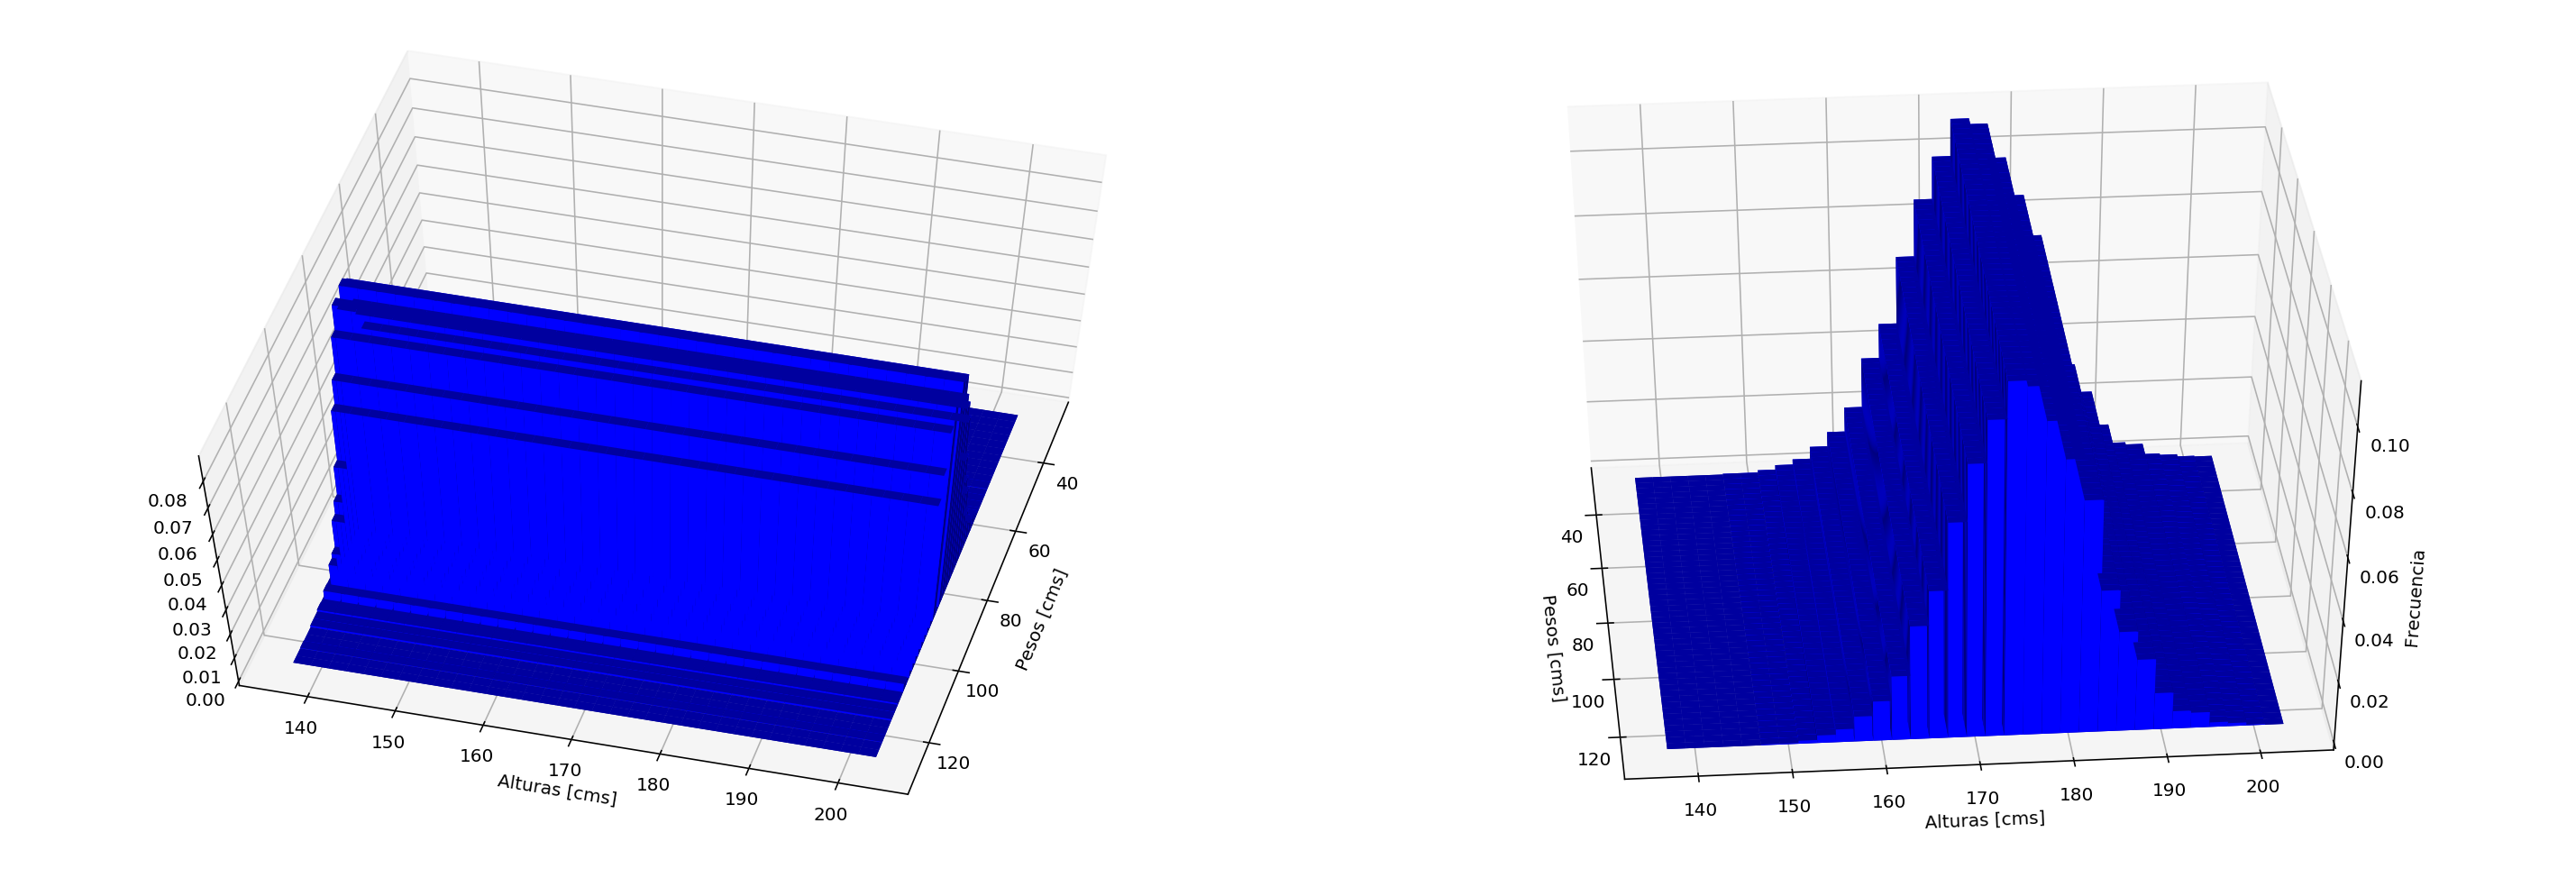

In [77]:
%matplotlib inline
ax1, ax2 = getAxis()
joint_hombres.plot_joint_3d(marg_pesos_hombres_rep.T, ax=ax1, color='b', az=60, el=15)
joint_mujeres.plot_joint_3d(marg_alturas_hombres_rep.T, ax=ax2, color='b', az=40, el=-5)

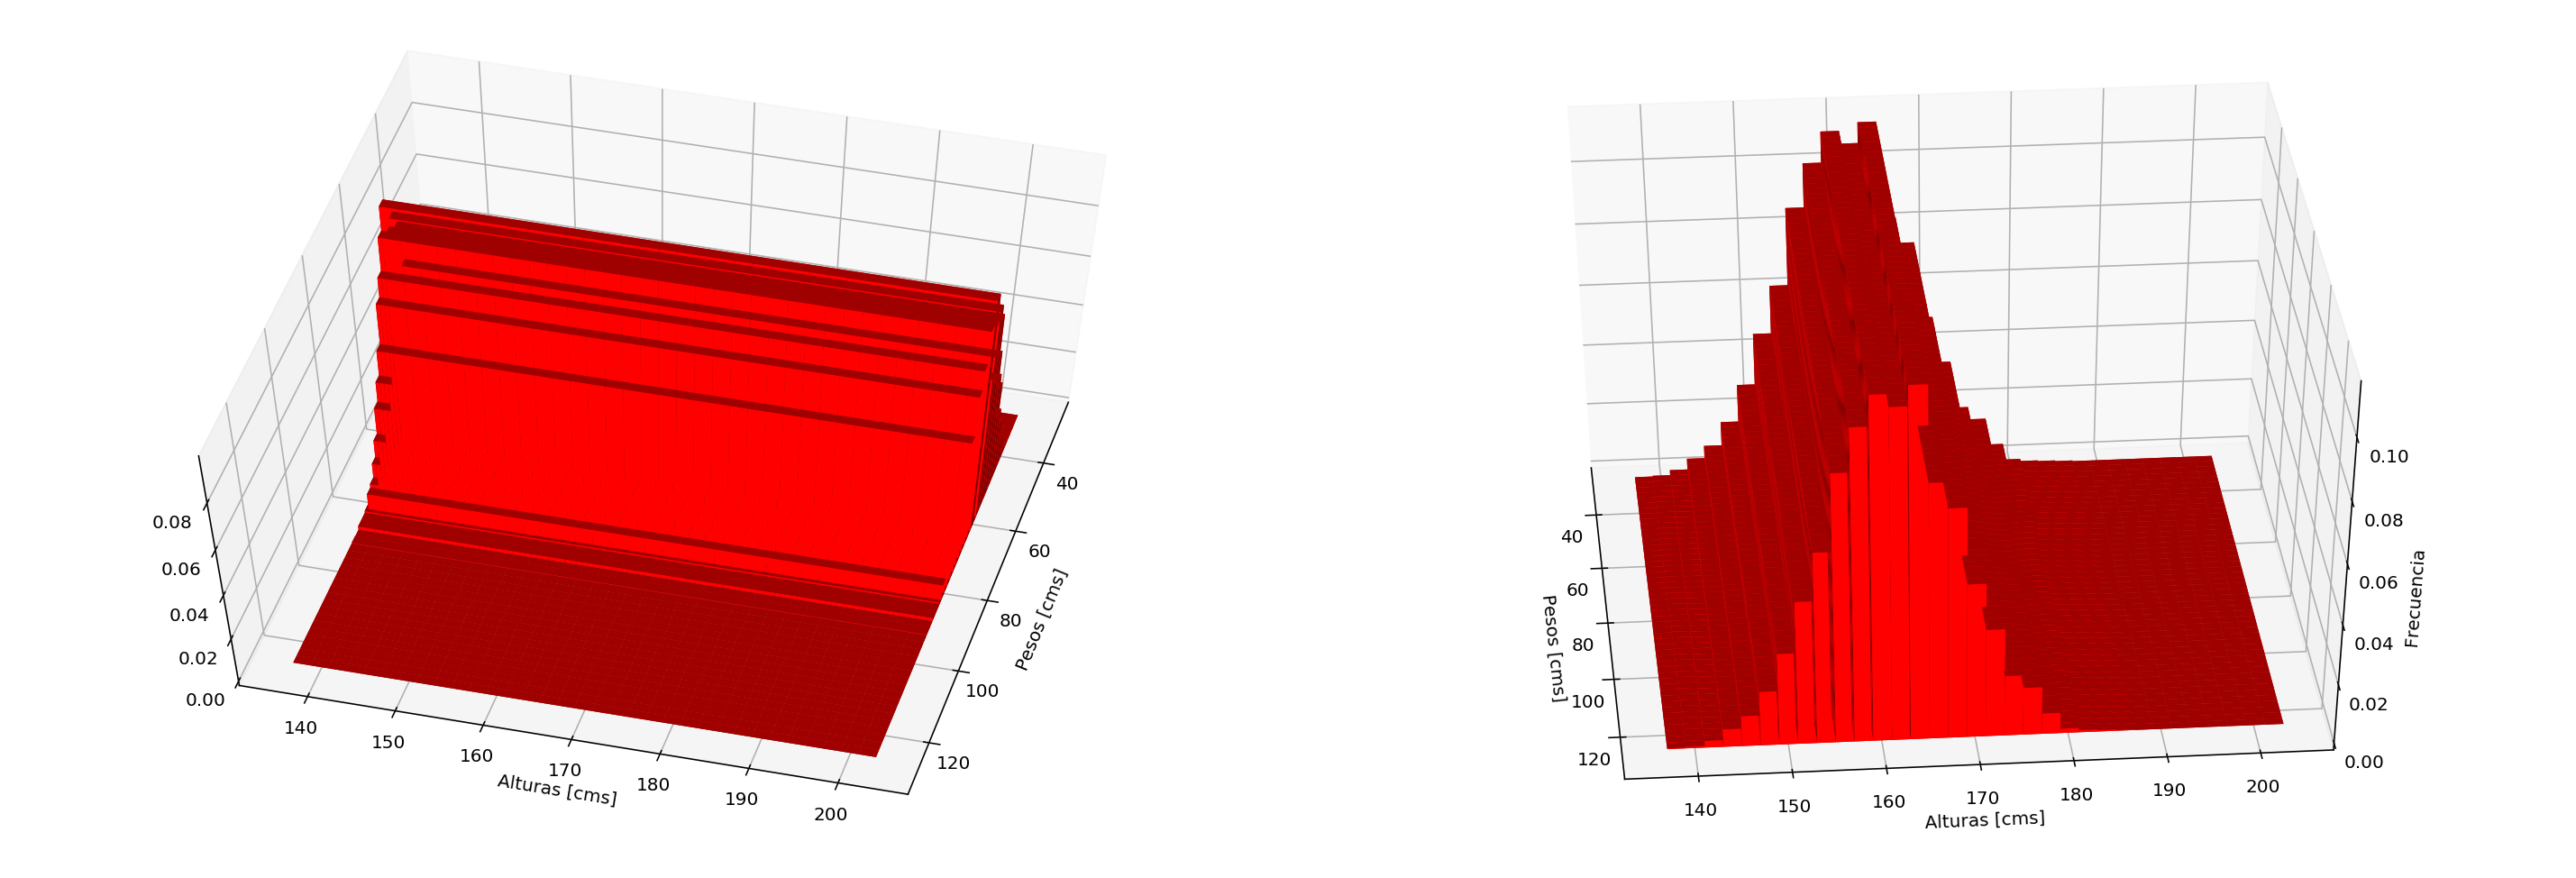

In [78]:
%matplotlib inline
ax1, ax2 = getAxis()
joint_hombres.plot_joint_3d(marg_pesos_mujeres_rep.T, ax=ax1, color='r', az=60, el=15)
joint_mujeres.plot_joint_3d(marg_alturas_mujeres_rep.T, ax=ax2, color='r', az=40, el=-5)

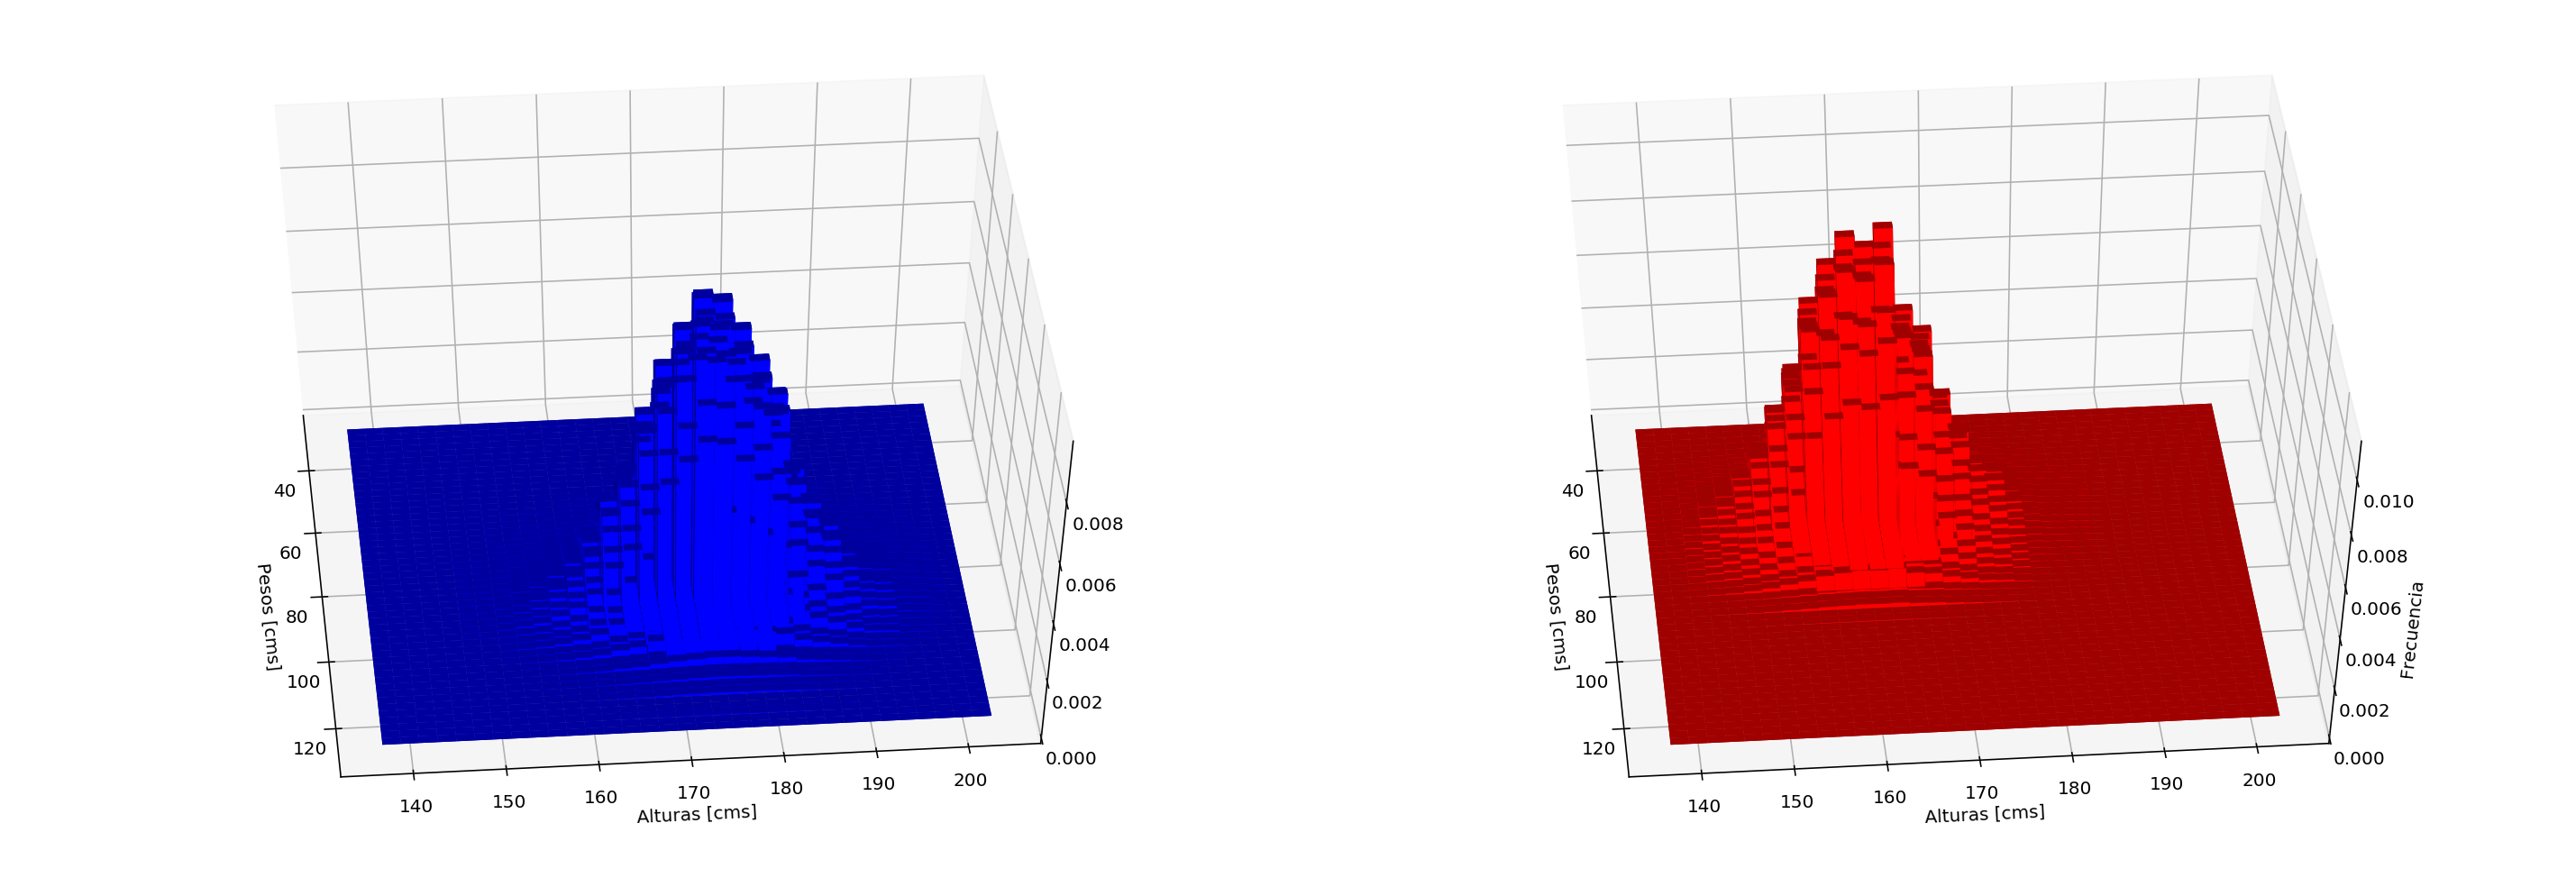

In [79]:
%matplotlib inline
ax1, ax2 = getAxis()
joint_hombres.plot_joint_3d(likelihood_indep_class_1, ax=ax1, color='b')
joint_mujeres.plot_joint_3d(likelihood_indep_class_2, ax=ax2, color='r')

\begin{equation}
P(Hombre | X_1, X_2) = \frac{P(X_1 | Hombre) P(X_2 | Hombre) P(Hombre)}{P(X_1,X_2)} \\
P(Mujer | X_1, X_2) = \frac{P(X_1 | Mujer) P(X_2 | Mujer) P(Mujer)}{P(X_1,X_2)}
\end{equation}

In [80]:
def get_class_prob_naive(x_data, y_data):
    prior_class_1 = joint_hombres.N/ (joint_hombres.N + joint_mujeres.N)
    prior_class_2 = joint_mujeres.N/ (joint_hombres.N + joint_mujeres.N)
    likelihood_class_1 = likelihood_indep_class_1[joint_hombres.data_to_index(x_data, y_data)] 
    likelihood_class_2 = likelihood_indep_class_2[joint_hombres.data_to_index(x_data, y_data)]
    total = likelihood_class_1*prior_class_1 + prior_class_2*likelihood_class_2
    # Evita division por cero
    total[total==0] = 1
    p_class_1 = prior_class_1*likelihood_class_1/total
    p_class_2 = prior_class_2*likelihood_class_2/total
    # Las indeterminadas en 0.5
    p_class_1[total==1] = 0.5
    p_class_2[total==1] = 0.5
    return p_class_1, p_class_2

In [81]:
p_class_1, p_class_2 = get_class_prob_naive(data['Peso'].values, data['Altura'].values)
acc_train_nbayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)
print(acc_train_nbayes)

0.883


In [82]:
p_class_1, p_class_2 = get_class_prob_naive(test['Peso'].values, test['Altura'].values)
acc_cv_nbayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
print(acc_cv_nbayes)

0.8805


In [83]:
X, Y = np.meshgrid(joint_hombres.X, joint_hombres.Y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    Z[i] = get_class_prob_naive(X[i], Y[i])[0]

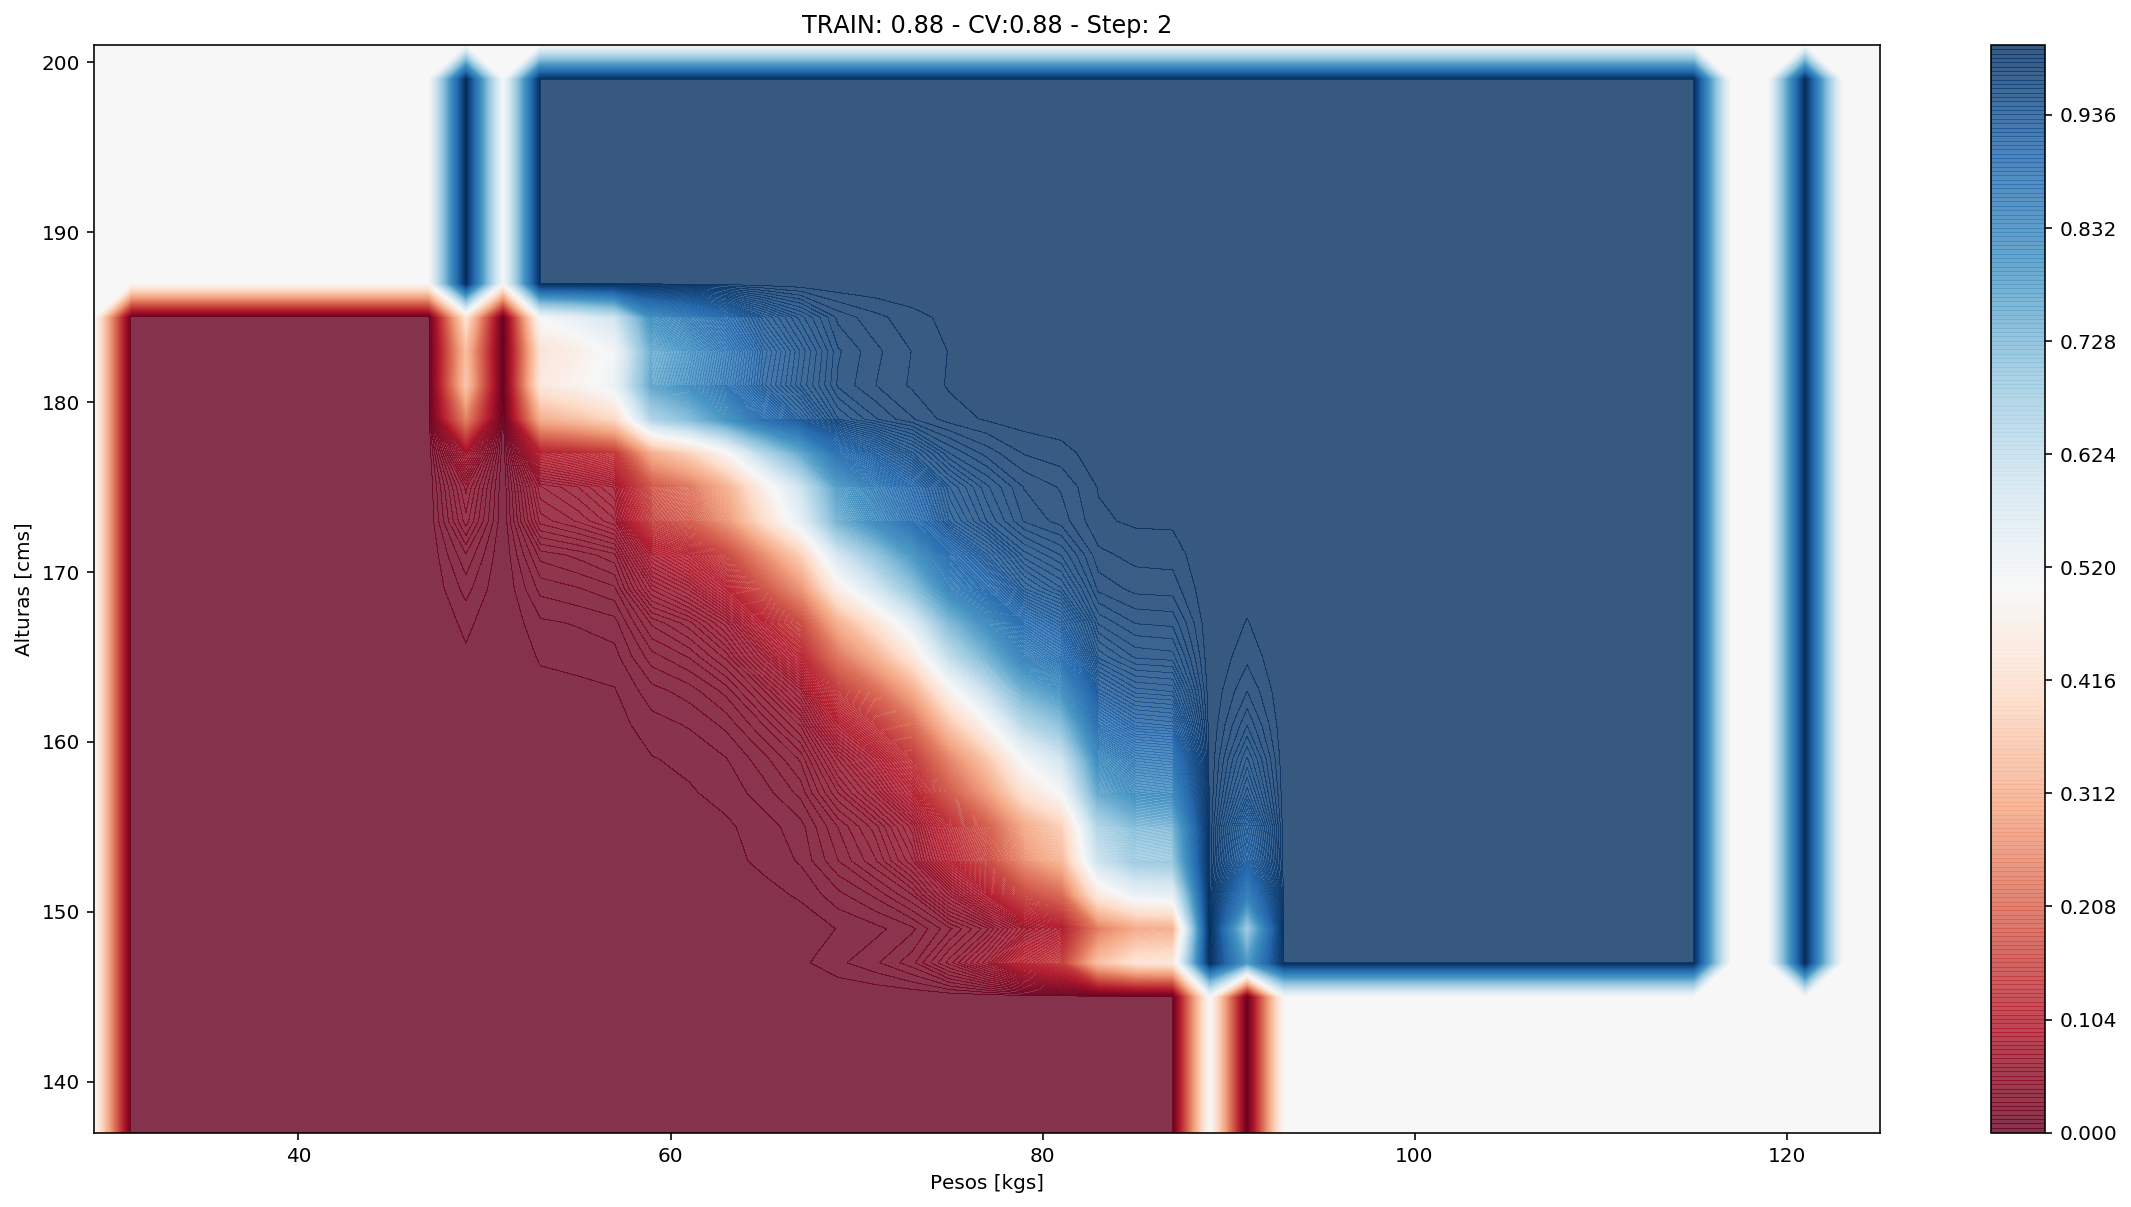

In [84]:
# %matplotlib qt
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.set_title('TRAIN: ' + str(np.round(acc_train_nbayes*100)/100) + ' - CV:' + str(np.round(acc_cv_nbayes*100)/100) +' - Step: '+str(step))
ax.set_xlabel('Pesos [kgs]')
ax.set_ylabel('Alturas [cms]')
plt.show()

# Bayes Gaussiano (Quadratic Discriminant Analisys)

\begin{equation}
P(Hombre | X_1, X_2) = \frac{p(X_1,X_2 | Hombre) P(Hombre)}{p(X_1,X_2)} \\
P(Mujer | X_1, X_2) = \frac{p(X_1,X_2 | Mujer) P(Mujer)}{p(X_1,X_2)} \\
p(X_1,X_2) = p(X_1,X_2 | Hombre) P(Hombre) + p(X_1,X_2 | Mujer) P(Mujer)
\end{equation}

In [85]:
peso_altura_hombres = data.loc[data['Genero']=='Hombre'][['Peso', 'Altura']].values
peso_altura_mujeres = data.loc[data['Genero']=='Mujer'][['Peso', 'Altura']].values

In [86]:
mean_hombres = peso_altura_hombres.mean(axis=0)
mean_mujeres = peso_altura_mujeres.mean(axis=0)

In [87]:
cov_hombres = np.cov(peso_altura_hombres.T)
cov_mujeres = np.cov(peso_altura_mujeres.T)

In [88]:
from scipy.stats import multivariate_normal

In [89]:
def get_gauss_prob(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres):
    data_np = data
    likelihood_class_1 = multivariate_normal.pdf(data_np, mean_hombres, cov_hombres)
    likelihood_class_2 = multivariate_normal.pdf(data_np, mean_mujeres, cov_mujeres)
    N_class_1 = len(peso_altura_hombres)
    N_class_2 = len(peso_altura_mujeres)
    prior_1 = N_class_1/(N_class_1 + N_class_2)
    prior_2 = N_class_2/(N_class_1 + N_class_2)
    total = likelihood_class_1 * prior_1 + likelihood_class_2 * prior_2
    p_class_1 = likelihood_class_1 * prior_1/total
    p_class_2 = likelihood_class_2 * prior_2/total
    return p_class_1, p_class_2

In [90]:
def get_acc_gauss(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres):
    p_class_1, p_class_2 = get_gauss_prob(data[['Peso', 'Altura']].values, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres)
    return ((p_class_1>p_class_2)==(data['Genero']=='Hombre')).sum()/len(p_class_1)

In [91]:
%time get_acc_gauss(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres)

CPU times: user 3.92 ms, sys: 1.42 ms, total: 5.34 ms
Wall time: 4.12 ms


0.91675

In [92]:
print(get_acc_gauss(test, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres))

0.9225


In [93]:
N = 300
X = np.linspace(joint_hombres.mins[0], joint_hombres.maxs[0], N)
Y = np.linspace(joint_hombres.mins[1], joint_hombres.maxs[1], N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z_H = multivariate_normal.pdf(pos, mean_hombres, cov_hombres)
Z_M = multivariate_normal.pdf(pos, mean_mujeres, cov_mujeres)
Z_gaus, _ = get_gauss_prob(pos, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres)

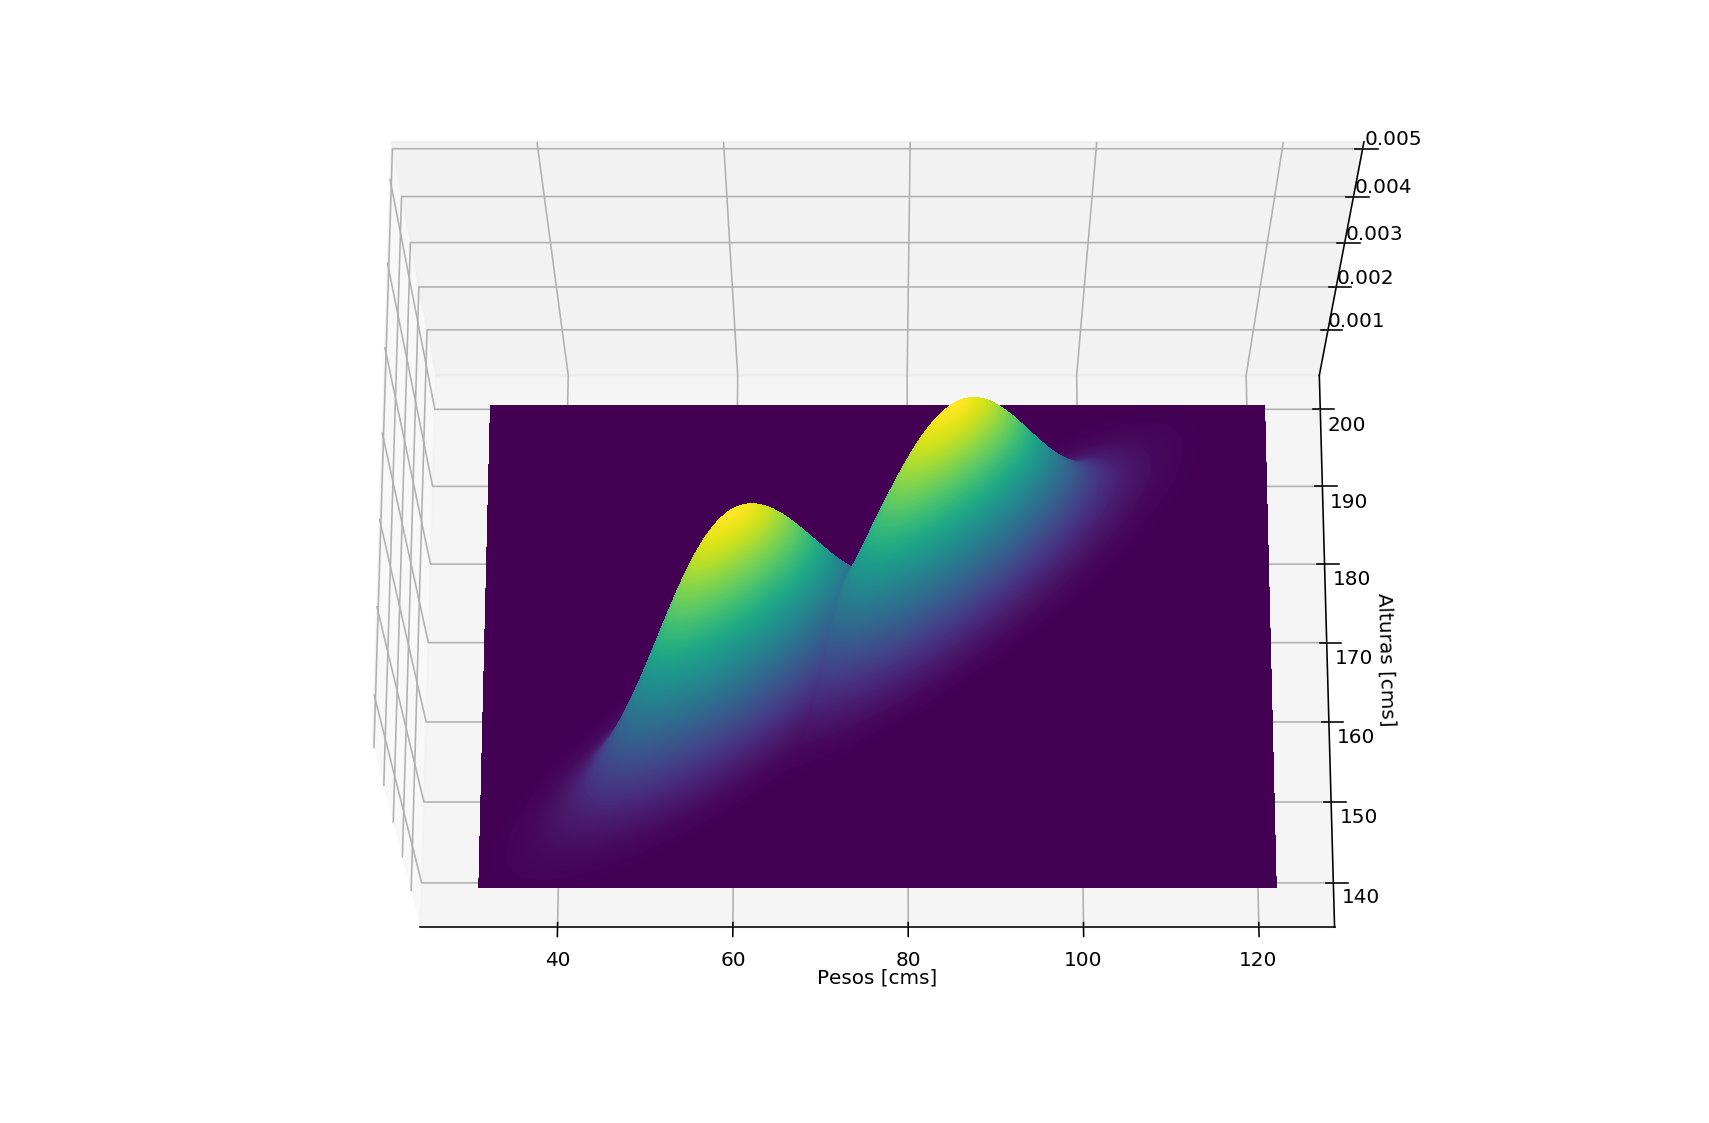

In [94]:
# %matplotlib qt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
#plt.colorbar(cf, ax=ax)
ax.contourf(X, Y, Z_H, 256)
ax.contourf(X, Y, Z_M, 256)
ax.view_init(70, -90)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()

### Likelihood Ratio
\begin{equation}
\frac{P(H_1 | X_1, X_2)}{P(H_0 | X_1, X_2)} = \frac{p(X_1,X_2 | H_1) P(H_1)}{p(X_1,X_2 | H_0) P(H_0)} \\
\end{equation}

\begin{equation}
likelihoodRatio = \frac{p(X_1,X_2 | H_1)}{p(X_1,X_2 | H_0)} \\
\end{equation}

Dado que las densidades son Gaussianas:

\begin{equation}
\large
\frac{\sqrt{|2\pi\Sigma_{x|H_1}|}^{-1} e^{-\frac{1}{2} (x-\mu_{x|H_1})^T\Sigma_{x|H_1}(x-\mu_{x|H_1}) }P(H_1)}
{\sqrt{|2\pi\Sigma_{x|H_0}|}^{-1} e^{-\frac{1}{2} (x-\mu_{x|H_0})^T\Sigma_{x|H_0}(x-\mu_{x|H_0}) } P(H_0)} = 1
\end{equation}

Aplicando logaritmos y agrupando todas las constantes en T:

\begin{equation}
\large
log{\frac{\sqrt{|2\pi\Sigma_{x|H_1}|}^{-1} e^{-\frac{1}{2} (x-\mu_{x|H_1})^T\Sigma_{x|H_1}(x-\mu_{x|H_1}) }P(H_1)}
{\sqrt{|2\pi\Sigma_{x|H_0}|}^{-1} e^{-\frac{1}{2} (x-\mu_{x|H_0})^T\Sigma_{x|H_0}(x-\mu_{x|H_0}) } P(H_0)}} = 0
\end{equation}

\begin{equation}
\large
(x-\mu_{x|H_0})^T\Sigma_{x|H_0}(x-\mu_{x|H_0}) - (x-\mu_{x|H_1})^T\Sigma_{x|H_1}(x-\mu_{x|H_1})  + \Sigma_{x|H_0} - \Sigma_{x|H_1} = T
\end{equation}

Notar que es cuadratica

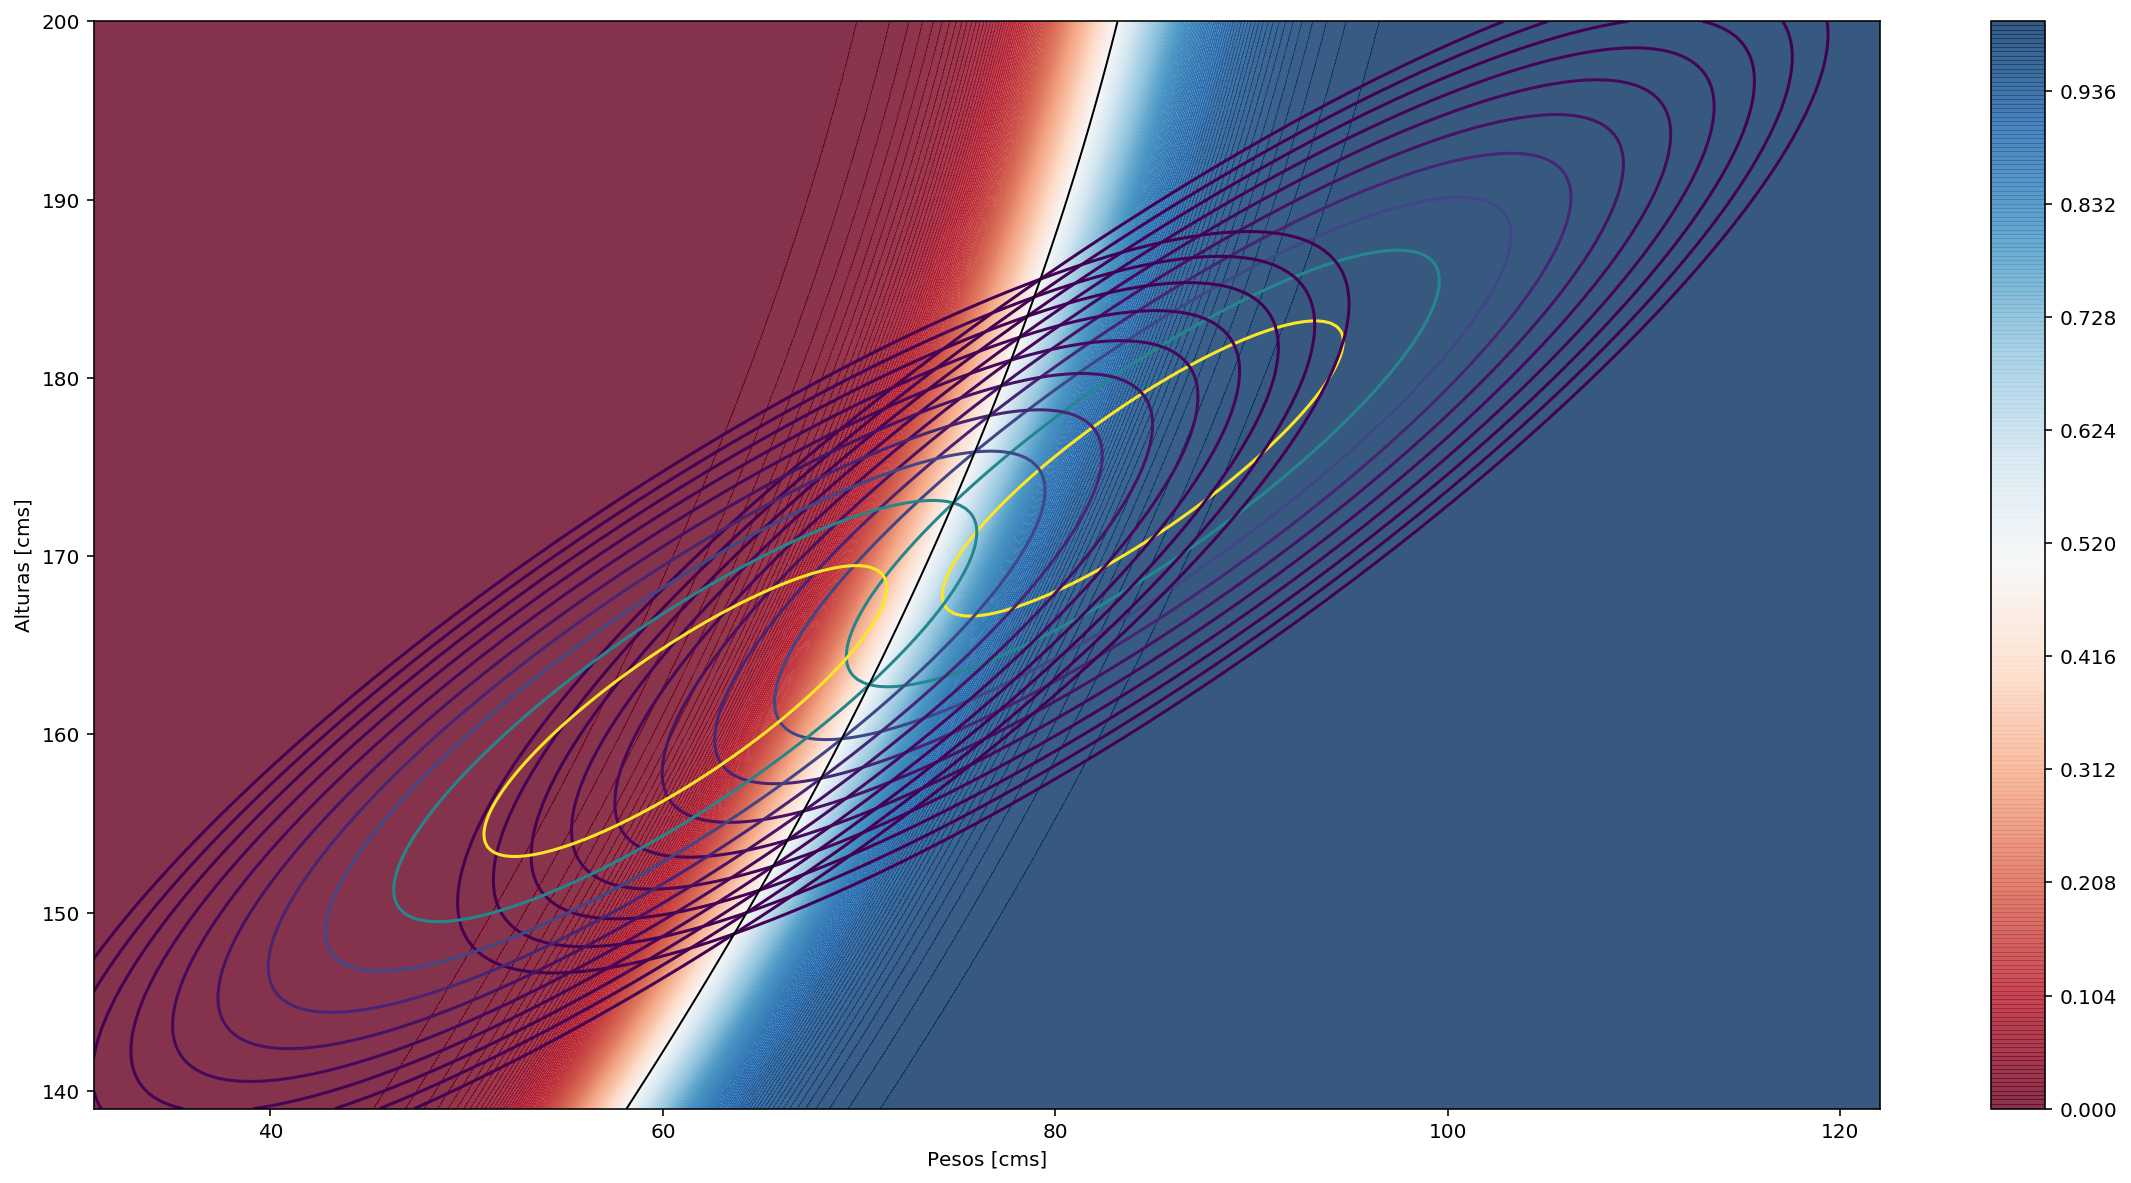

In [95]:
# %matplotlib qt
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cf = ax.contourf(X, Y, Z_gaus, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
z_levels = np.logspace(-5,-2,10)/4
ax.contour(X, Y, Z_H, z_levels)
ax.contour(X, Y, Z_M, z_levels)
ax.contour(X, Y, Z_gaus, (0.5,), colors='k', linewidths=1)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()

# LDA

### Supone $\Sigma_{x|H_0}=\Sigma_{x|H_1}$

In [96]:
mean_hombres = peso_altura_hombres.mean(axis=0)
mean_mujeres = peso_altura_mujeres.mean(axis=0)
cov_LDA = np.cov(np.vstack([peso_altura_hombres - mean_hombres, peso_altura_mujeres - mean_mujeres]).T)

In [97]:
N = 300
X = np.linspace(joint_hombres.mins[0], joint_hombres.maxs[0], N)
Y = np.linspace(joint_hombres.mins[1], joint_hombres.maxs[1], N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z_H_LDA = multivariate_normal.pdf(pos, mean_hombres, cov_LDA)
Z_M_LDA = multivariate_normal.pdf(pos, mean_mujeres, cov_LDA)
Z_LDA, _ = get_gauss_prob(pos, mean_hombres, mean_mujeres, cov_LDA, cov_LDA)

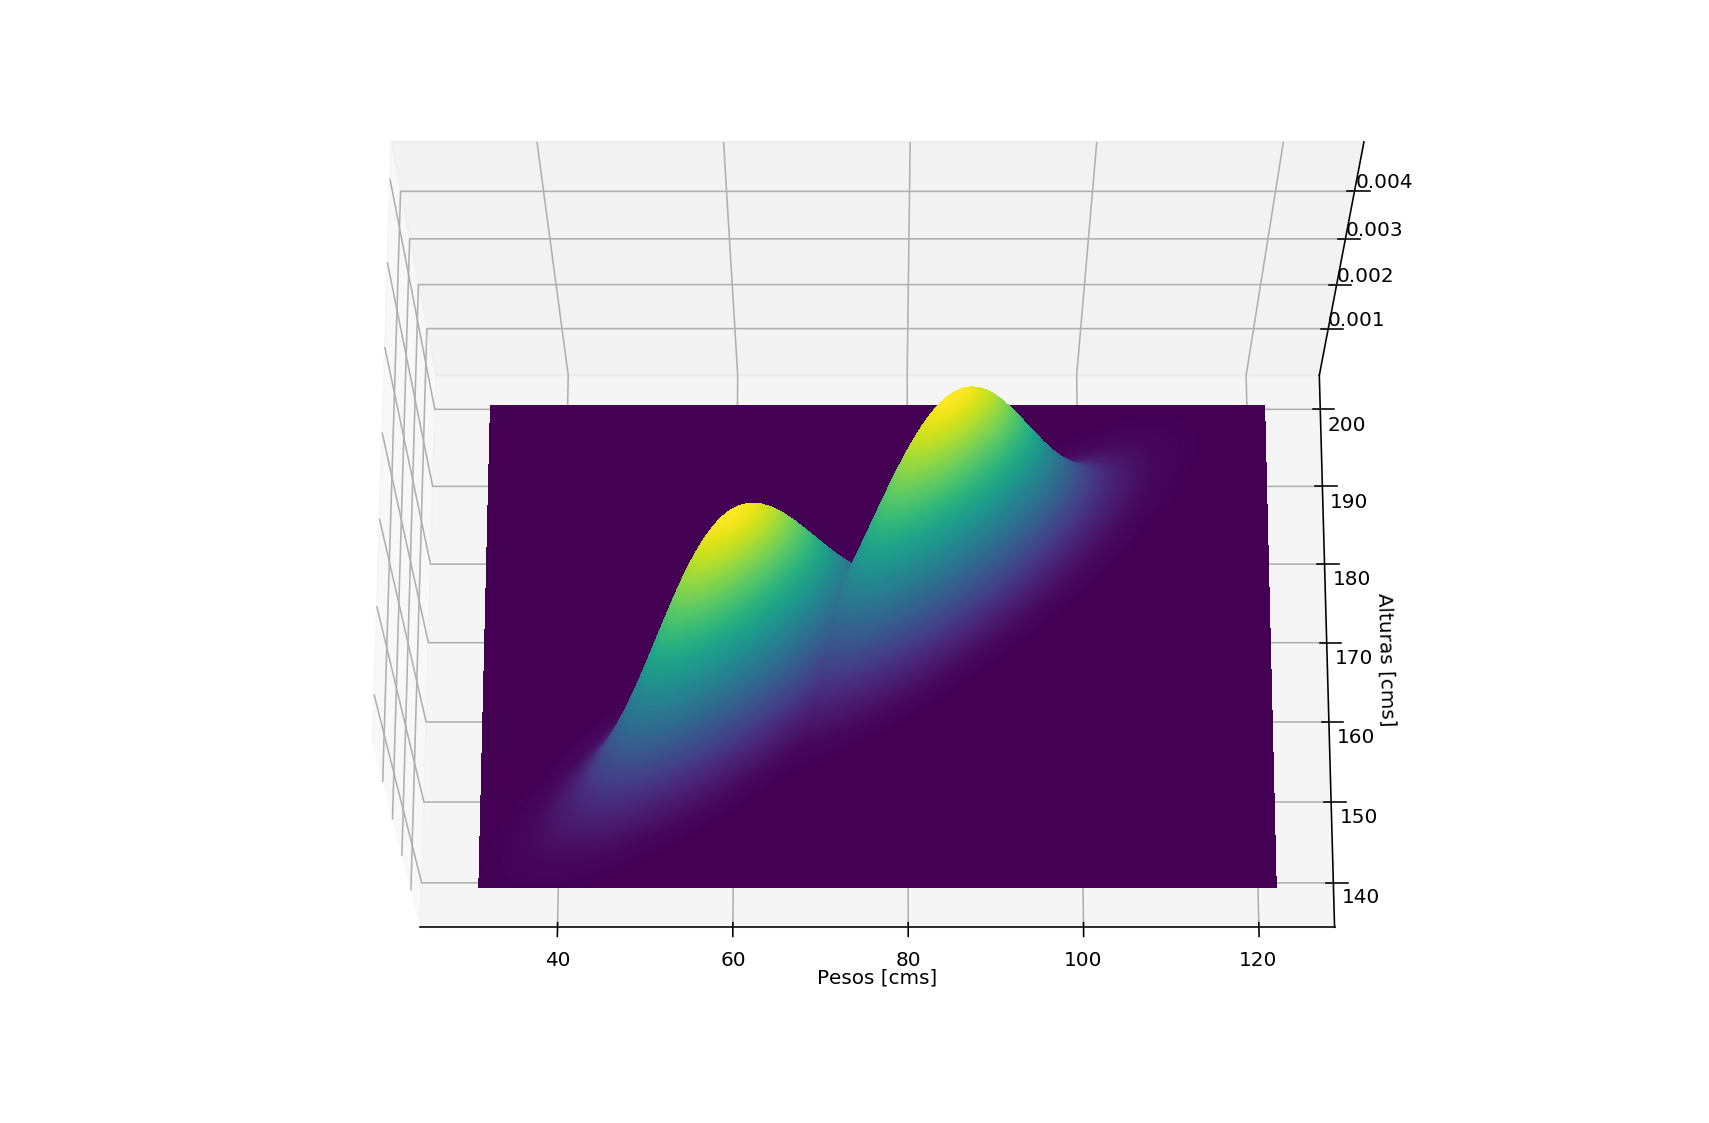

In [98]:
# %matplotlib qt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
#plt.colorbar(cf, ax=ax)
ax.contourf(X, Y, Z_H_LDA, 256)
ax.contourf(X, Y, Z_M_LDA, 256)
ax.view_init(70, -90)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()

### Log-likelihood

\begin{equation}
\large
(x-\mu_{x|H_0})^T\Sigma_{x|H_0}(x-\mu_{x|H_0}) - (x-\mu_{x|H_1})^T\Sigma_{x|H_1}(x-\mu_{x|H_1})  + \Sigma_{x|H_0} - \Sigma_{x|H_1} = T
\end{equation}
Suponiendo $\Sigma_{x|H_0}=\Sigma_{x|H_1}$
\begin{equation}
WX = c
\end{equation}

\begin{equation}
W = \Sigma_{-1}(\mu_{x|H_1}-\mu_{x|H_0})
\end{equation}

\begin{equation}
c = \frac{1}{2}(T - \mu_{x|H_0}^T \Sigma^{-1}\mu_{x|H_0} + \mu_{x|H_1}^T \Sigma^{-1}\mu_{x|H_1})
\end{equation}

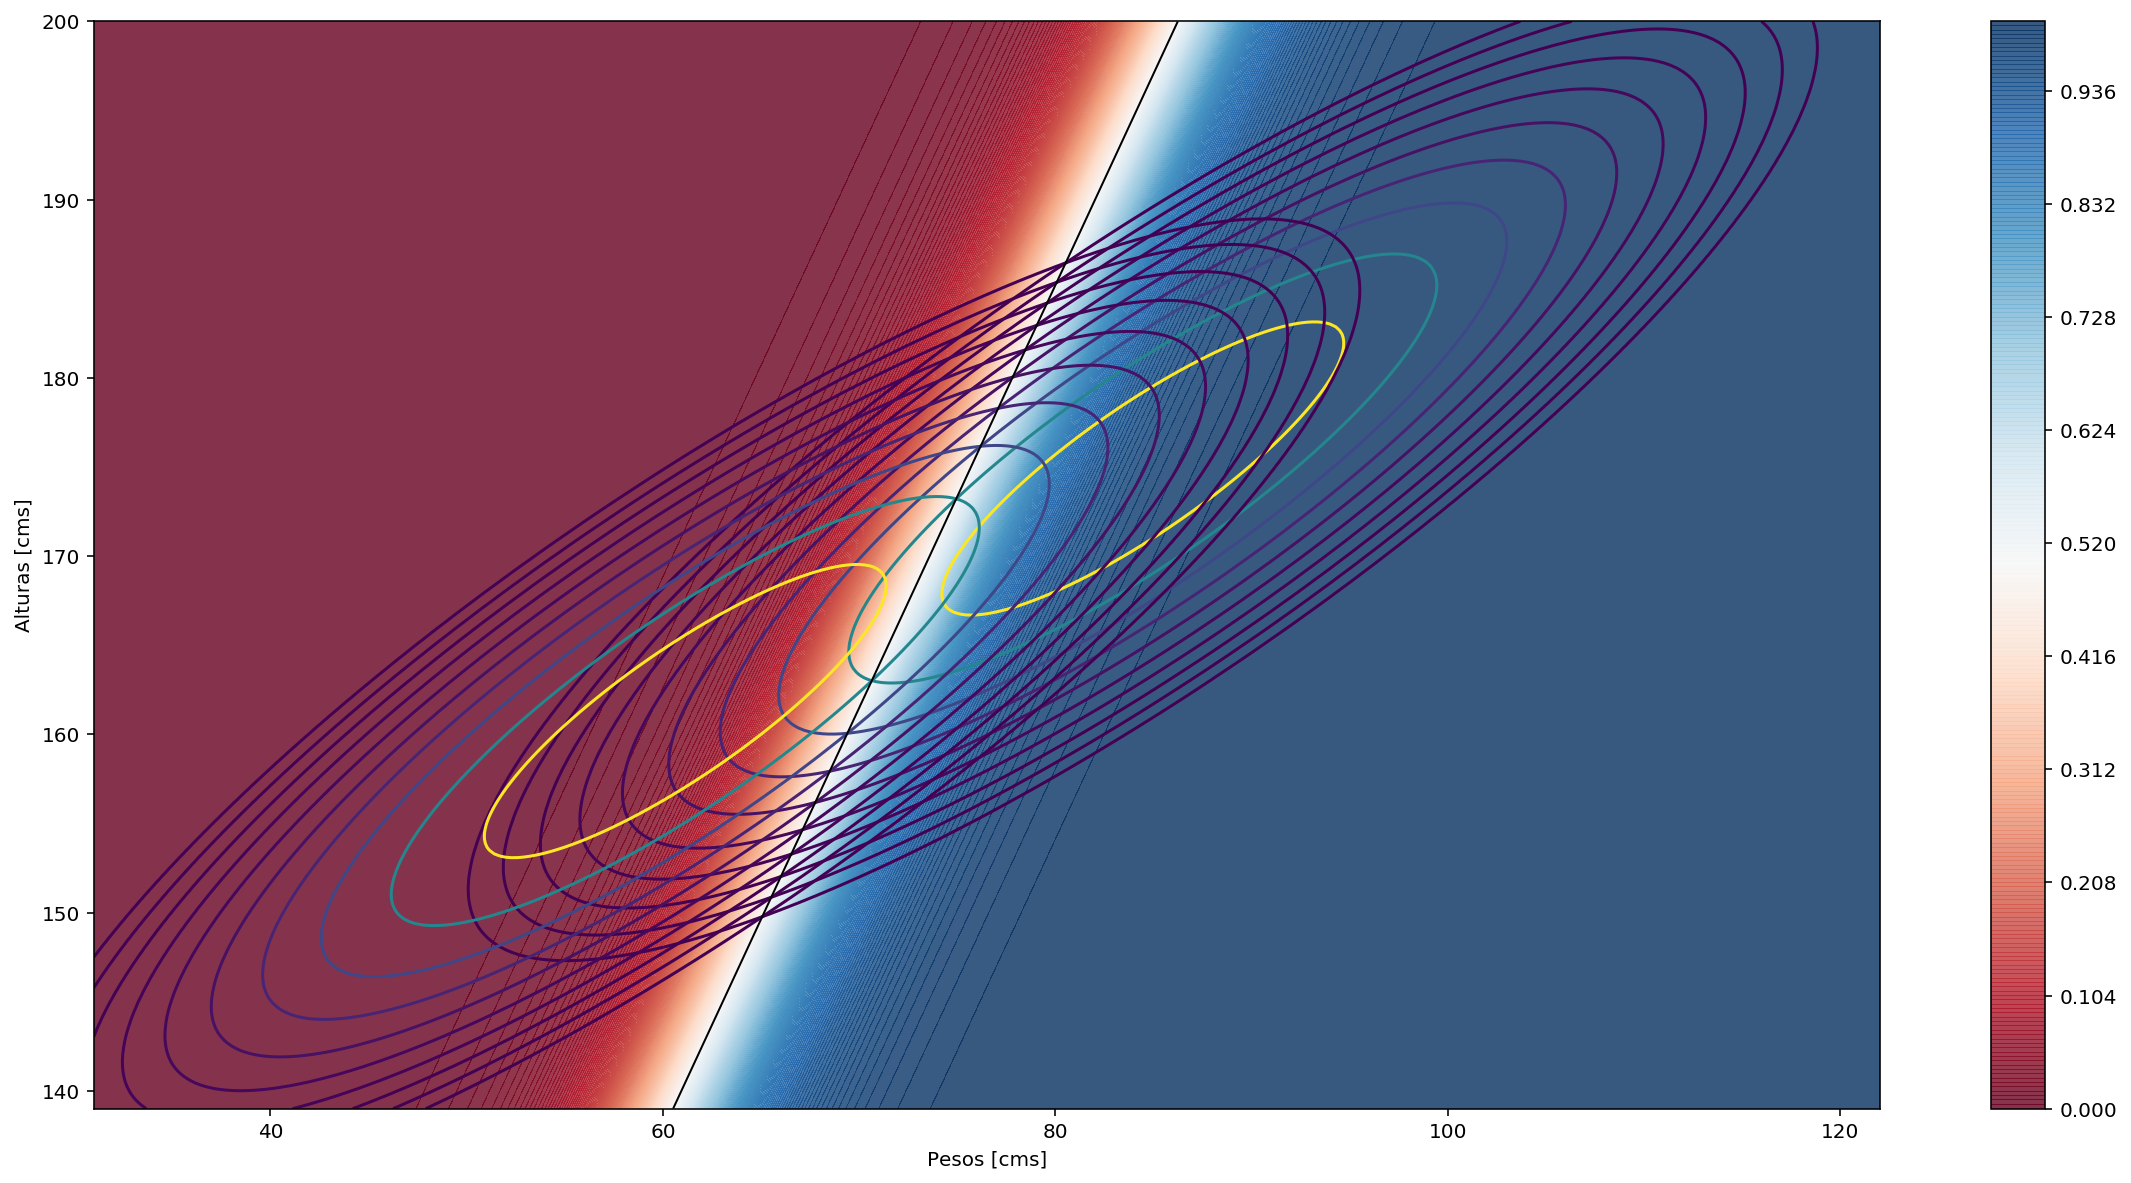

In [99]:
# %matplotlib qt
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_LDA, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
z_levels = np.logspace(-5,-2,10)/4
ax.contour(X, Y, Z_H_LDA, z_levels)
ax.contour(X, Y, Z_M_LDA, z_levels)
ax.contour(X, Y, Z_LDA, (0.5,), colors='k', linewidths=1)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()

# Naive Bayes Gaussiano

In [102]:
cov_hombres*np.identity(2)

array([[80.69463867,  0.        ],
       [ 0.        , 53.02237224]])

In [103]:
def get_prob_naive(data):
    data_np = data
    likelihood_class_1 = multivariate_normal.pdf(data_np, mean_hombres, cov_hombres*np.identity(2))
    likelihood_class_2 = multivariate_normal.pdf(data_np, mean_mujeres, cov_mujeres*np.identity(2))
    N_class_1 = len(peso_altura_hombres)
    N_class_2 = len(peso_altura_mujeres)
    prior_1 = N_class_1/(N_class_1 + N_class_2)
    prior_2 = N_class_2/(N_class_1 + N_class_2)
    total = likelihood_class_1 * prior_1 + likelihood_class_2 * prior_2
    p_class_1 = likelihood_class_1 * prior_1/total
    p_class_2 = likelihood_class_2 * prior_2/total
    return p_class_1, p_class_2

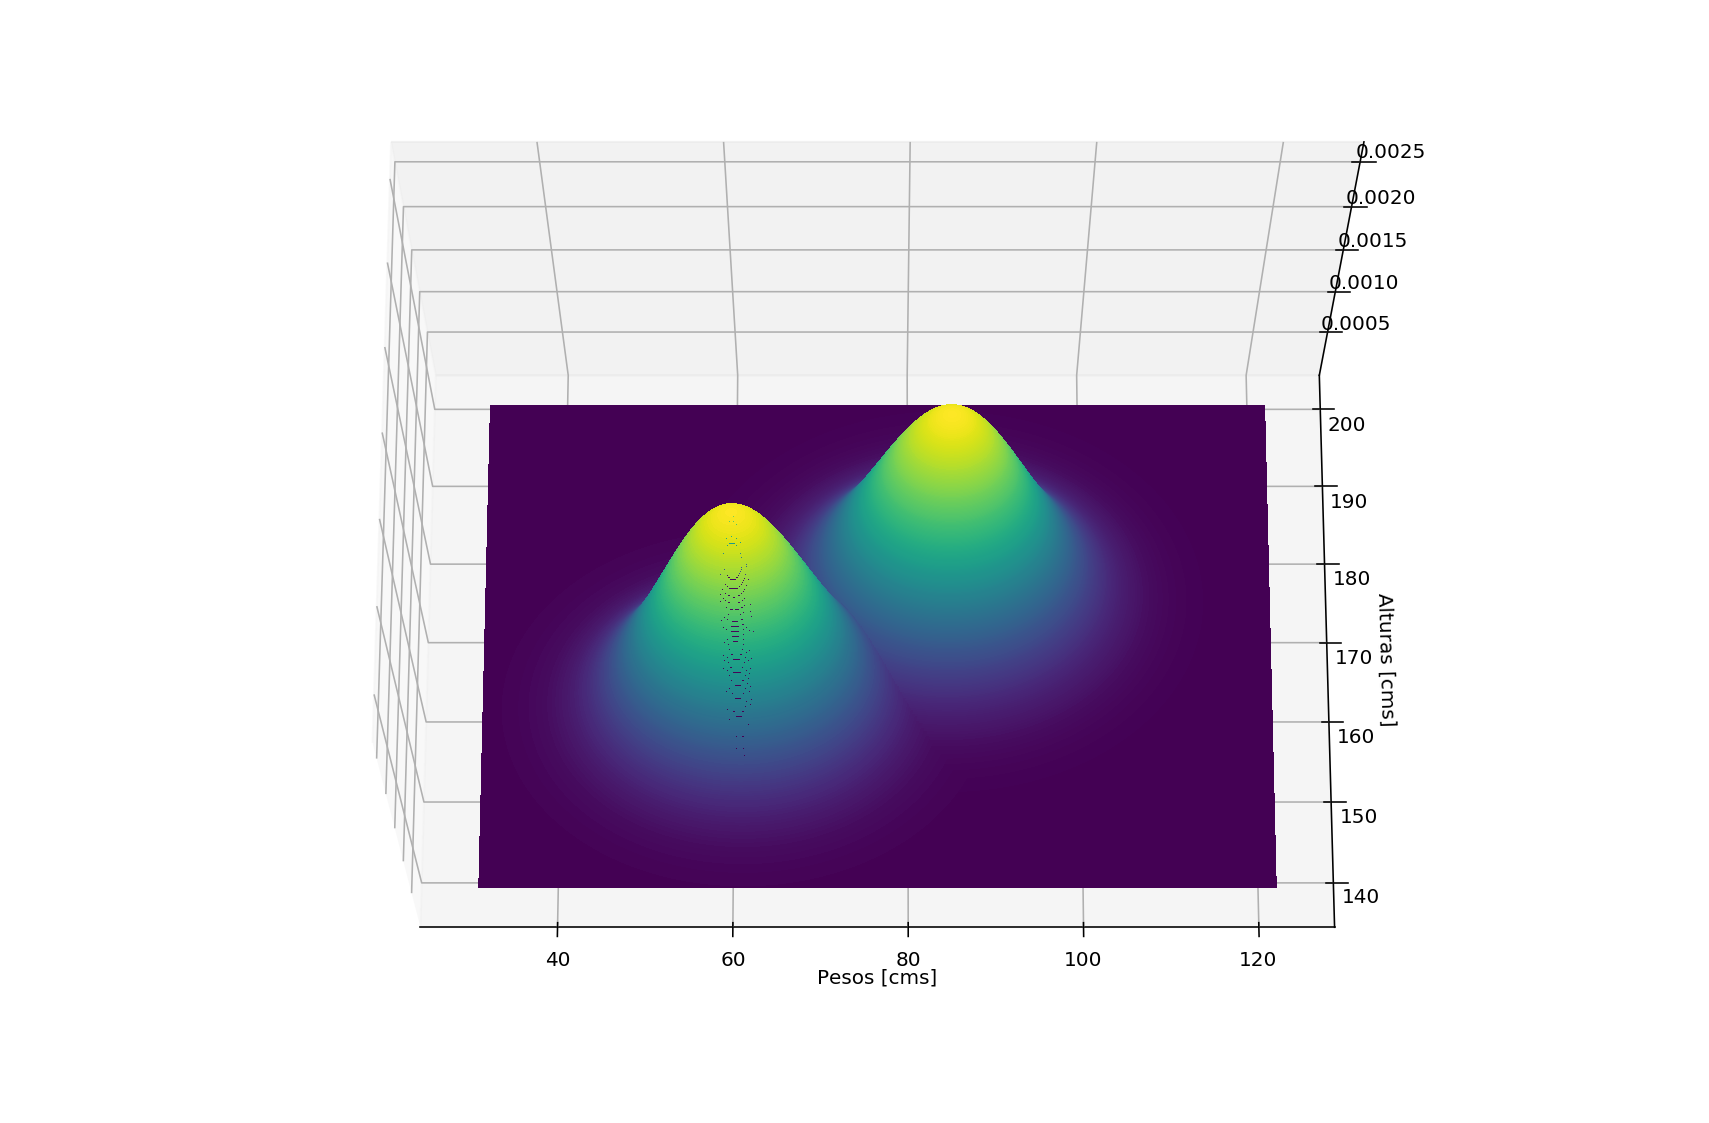

In [104]:
N = 300
X = np.linspace(joint_hombres.mins[0], joint_hombres.maxs[0], N)
Y = np.linspace(joint_hombres.mins[1], joint_hombres.maxs[1], N)
X, Y = np.meshgrid(X, Y)


# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z_H_nb = multivariate_normal.pdf(pos, mean_hombres, cov_hombres*np.identity(2))
Z_M_nb = multivariate_normal.pdf(pos, mean_mujeres, cov_mujeres*np.identity(2))
Z_nb, _ = get_prob_naive(pos)

%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
#plt.colorbar(cf, ax=ax)
ax.contourf(X, Y, Z_H_nb, 256)
ax.contourf(X, Y, Z_M_nb, 256)
ax.view_init(70, -90)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()

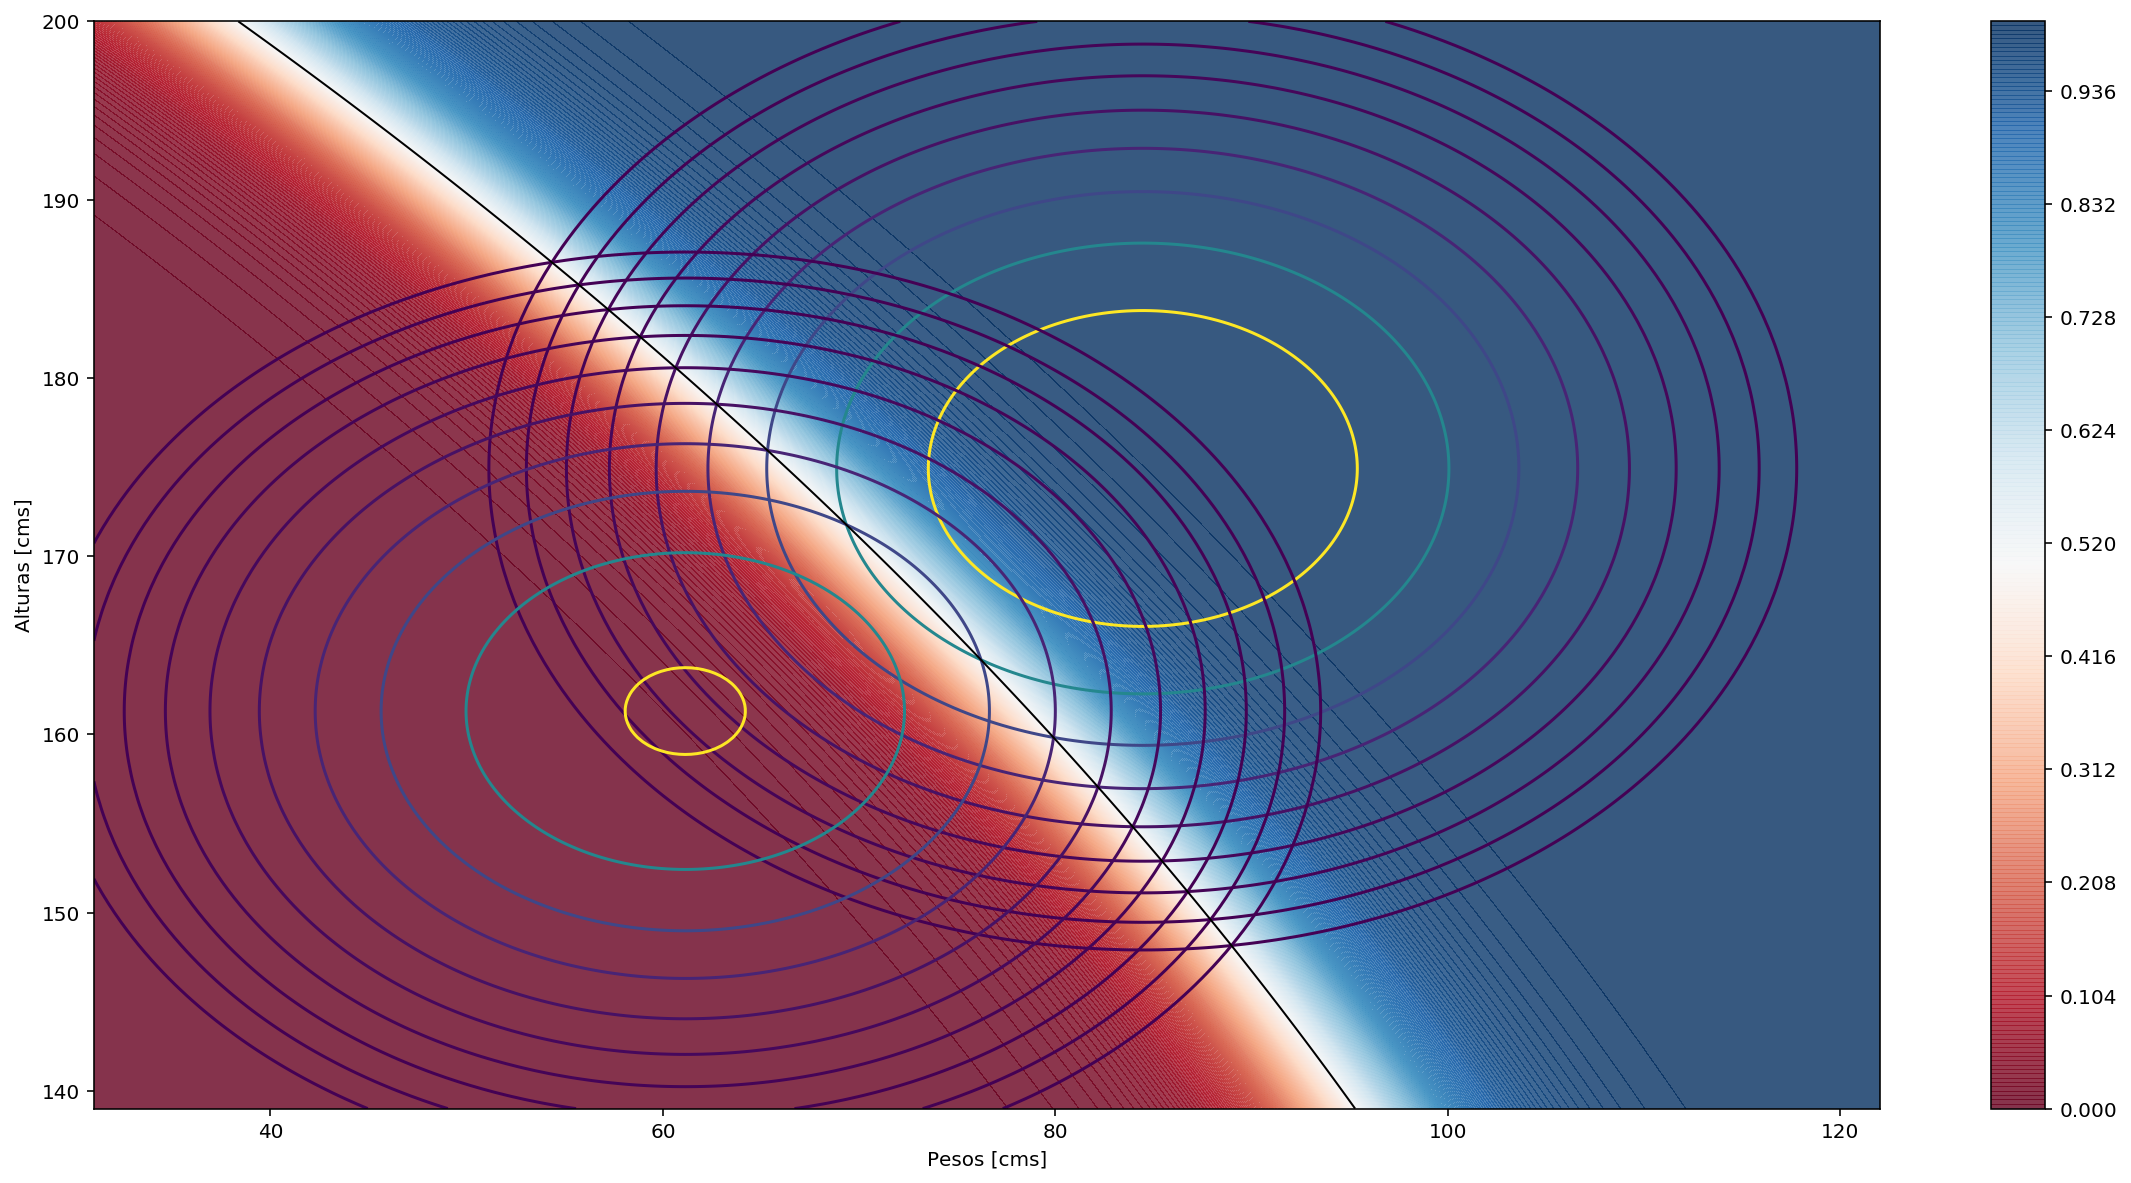

In [106]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_nb, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
z_levels = np.logspace(-5,-2,10)/4
ax.contour(X, Y, Z_H_nb, z_levels)
ax.contour(X, Y, Z_M_nb, z_levels)
ax.contour(X, Y, Z_nb, (0.5,), colors='k', linewidths=1)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()

In [107]:
def get_acc_gauss_naive(data):
    p_class_1, p_class_2 = get_prob_naive(data[['Peso', 'Altura']].values)
    return ((p_class_1>p_class_2)==(data['Genero']=='Hombre')).sum()/len(p_class_1)

In [108]:
get_acc_gauss_naive(data)

0.887

In [109]:
get_acc_gauss_naive(test)

0.887

In [110]:
acc_train_bayes, acc_cv_bayes, acc_train_nbayes, acc_cv_nbayes, step

(0.90875, 0.908, 0.883, 0.8805, 2)

|Modelo| tipo| Train Acc| CV Acc|Comentarios
|-| -| -| -|-|
|Histogram - step 0.25|Bayes|0.97|0.68
|Histogram - step 0.25|Naive Bayes|0.89|0.88
|Histogram - step 0.5|Bayes|0.94|0.82
|Histogram - step 0.5|Naive Bayes|0.89|0.88
|Histogram - step 1|Bayes|0.92|0.90
|Histogram - step 1|Naive Bayes|0.89|0.88
|Histogram - step 4|Bayes|0.91|0.92| No generaliza por afuera de la zona de los puntos
|Histogram - step 4|Naive Bayes|0.89|0.88
|Histogram - step 8|Bayes|0.90|0.90
|Histogram - step 8|Naive Bayes|0.87|0.86
|Gaussian|Bayes|0.92|0.92|
|Gaussian|Naive Bayes|0.89|0.89|
|Regresion Logística|-|0.92|0.92|

# Regresion Logistica

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log_Reg = LogisticRegression()

In [12]:
log_Reg.fit(data[['Peso', 'Altura']].values, data['Genero'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
data[['Peso', 'Altura']][:10]

Peso   Altura
0  61.235  162.402
1  97.432  181.908
2  73.324  172.459
3  55.193  157.748
4  56.886  151.798
5  59.834  158.623
6  77.618  172.705
7  68.889  169.225
8  53.874  155.487
9  83.248  177.908

In [13]:
log_Reg.score(data[['Peso', 'Altura']].values, data['Genero'])

0.916625

In [14]:
log_Reg.score(test[['Peso', 'Altura']].values, test['Genero'])

0.922

In [116]:
log_Reg.predict_proba(test[['Peso', 'Altura']].values)

array([[0.99666865, 0.00333135],
       [0.0126448 , 0.9873552 ],
       [0.05577078, 0.94422922],
       ...,
       [0.00175296, 0.99824704],
       [0.96834101, 0.03165899],
       [0.01645579, 0.98354421]])

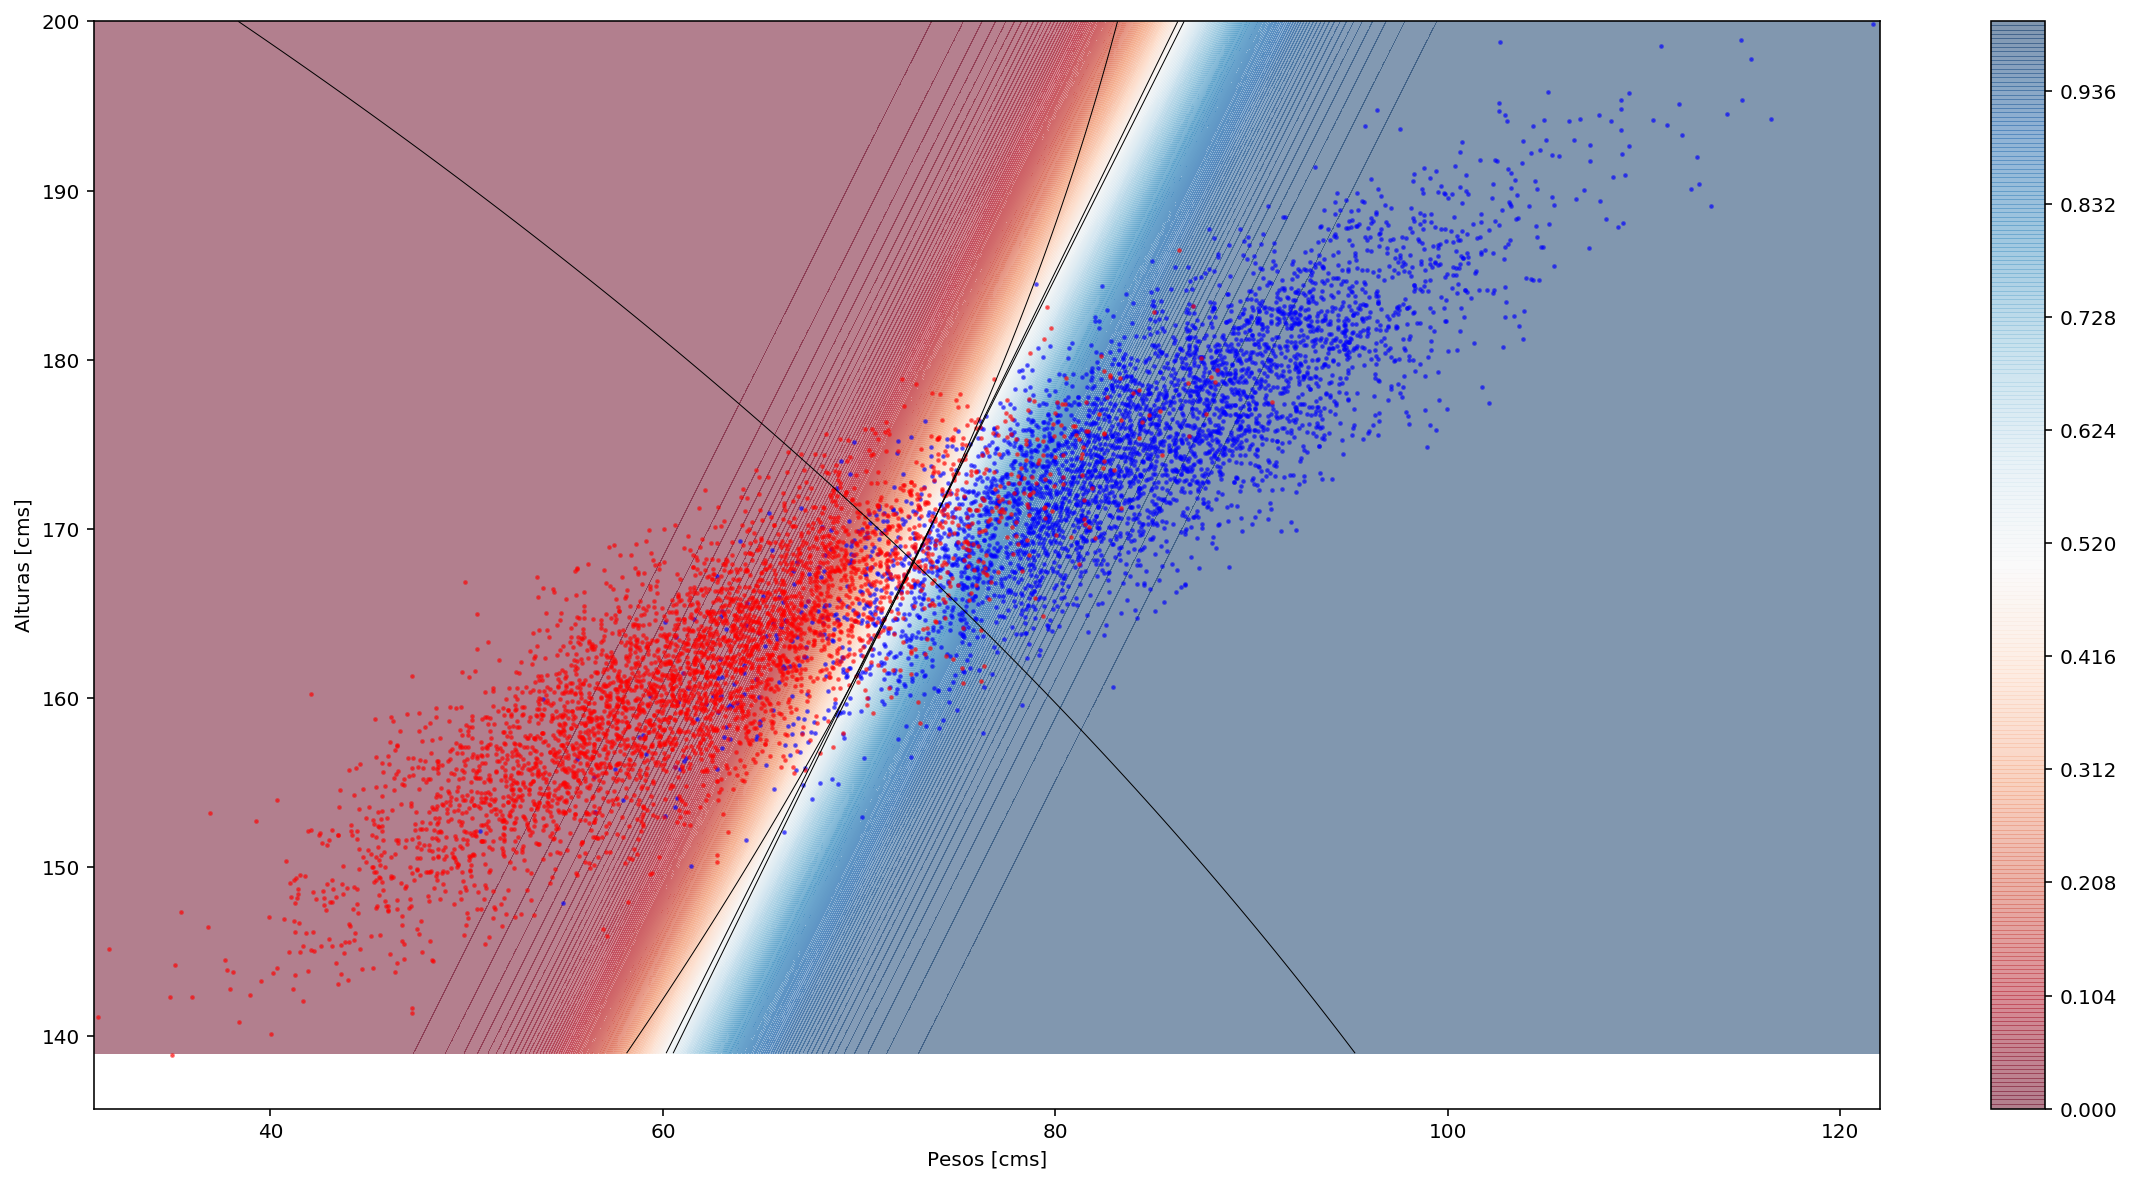

In [120]:
%matplotlib inline
N = 300
X = np.linspace(joint_hombres.mins[0], joint_hombres.maxs[0], N)
Y = np.linspace(joint_hombres.mins[1], joint_hombres.maxs[1], N)
X, Y = np.meshgrid(X, Y)

Z_lr = log_Reg.predict_proba(np.c_[X.ravel(), Y.ravel()])[:, 0]

# Put the result into a color plot
Z_lr = Z_lr.reshape(X.shape)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_lr, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)
ax.contour(X, Y, Z_lr, (0.5,), colors='k', linewidths=0.5)
ax.contour(X, Y, Z_gaus, (0.5,), colors='k', linewidths=0.5)
ax.contour(X, Y, Z_nb, (0.5,), colors='k', linewidths=0.5)
ax.contour(X, Y, Z_LDA, (0.5,), colors='k', linewidths=0.5)
#ax.contour(X, Y, Z_H, z_levels, linewidths=0.5)
#ax.contour(X, Y, Z_M, z_levels, linewidths=0.5)
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, alpha=0.5)
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, alpha=0.5)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.colorbar(cf, ax=ax)
plt.show()